# Exploratory Data Analysis 

## About the Data

The **Airbnb Listing Data 2023** from Website dataset contains information about Airbnb listings in over 190 countries. The dataset includes information about the location of the listing, the price, the number of bedrooms and bathrooms, the amenities offered, and the reviews of the listing. The dataset was scraped from the Airbnb website using a web scraping tool.  

The dataset is a valuable resource for researchers and businesses who are interested in the short-term rental market. The dataset can be used to analyze the trends in the short-term rental market, to identify the most popular destinations for short-term rentals, and to compare the prices of short-term rentals in different locations.  

The dataset is also a valuable resource for travelers who are looking for a place to stay. The dataset can be used to find affordable and convenient accommodations in different locations.  

The dataset is available for download on Kaggle. The dataset is licensed under the Creative Commons Attribution 4.0 International License.

> https://www.kaggle.com/datasets/joyshil0599/airbnb-listing-data-for-data-science?select=airnb.csv

## 1. Project Understanding

### The Essence of Exploratory Data Analysis:  

EDA is an iterative process that aims to discover patterns, detect anomalies, and extract insights from data. It involves examining the underlying structure, relationships, and distributions within a dataset before diving into complex modeling or hypothesis testing. By adopting a systematic approach to EDA, you can develop a comprehensive understanding of your data, leading to more effective problem-solving and actionable outcomes.  

### Understanding what the project is trying to solve  

The project stakeholder is looking to find out where is the most profitable location to buy a rental property with potentially the least maintenance costs, although this is a nice to have.  

### Must Have  

- Median Price by State per day
- Price Range(Min - Max) per day
  - by state
  - by property type
  - by number of beds
- Heatmap to show most profitable by state, shown as a Dashboard.

## 2. Variable Description

We need to know our variables before we can analyze them. This way we can have a clear understanding before proceeding.  

1. **Title:** This is a string value that describes the type of property, and location of the property
2. **Detail:** This is a string value describing the type of property
3. **Date:** This is a string value describing a range of dates
4. **Price(in dollar):** This is a float value describing price
5. **Offer price(in dollar):** This is a float value describing price that was offered originally for the property
6. **Review and rating:** This is float value describing a rating for the property and an integer value describing how many ratings were provided
7. **Number of bed:** This is a string value describing the number of beds at the property

## 3. Data Cleaning and Preprocessing

### Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# reads the data from the file
df = pd.read_csv('airnb.csv', encoding="ISO-8859-1")

### Data Description

In [2]:
# show the top 5 rows
df.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed


- **Title** I can see straight away that feature engineering is required in order to create type of property and some deeper insight into location.  
- **Date** This will need to become 2 features for check-in and check-out dates


In [3]:
# Get the size of the data set
print("Data set size:", df.shape)

# Get the number of observations and the names and data types of the columns
print(df.info())

Data set size: (953, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   953 non-null    object
 1   Detail                  953 non-null    object
 2   Date                    953 non-null    object
 3   Price(in dollar)        953 non-null    object
 4   Offer price(in dollar)  166 non-null    object
 5   Review and rating       947 non-null    object
 6   Number of bed           953 non-null    object
dtypes: object(7)
memory usage: 52.2+ KB
None


Data types will need to be changed to align with what we consider the data dictionary to outline.

In [4]:
# show descriptive statistics
df.describe()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
count,953,953,953,953,166,947,953
unique,756,839,204,322,108,754,33
top,"Apartment in Kuala Lumpur, Malaysia",Cozy room 48.5 sq.m @The Astra near Night market,May 1 - 6,111.00,66.00,New,2 beds
freq,7,3,219,13,4,16,221


In [5]:
# show descriptive statistics transposed
df.describe().T

,count,unique,top,freq
Title,953,756,"Apartment in Kuala Lumpur, Malaysia",7
Detail,953,839,Cozy room 48.5 sq.m @The Astra near Night market,3
Date,953,204,May 1 - 6,219
Price(in dollar),953,322,111.00,13
Offer price(in dollar),166,108,66.00,4
Review and rating,947,754,New,16
Number of bed,953,33,2 beds,221


In [6]:
# show column names
df.columns

Index(['Title', 'Detail', 'Date', 'Price(in dollar)', 'Offer price(in dollar)',
       'Review and rating', 'Number of bed'],
      dtype='object')

In [7]:
# select columns that are objects
df.select_dtypes(include=['object']).columns

Index(['Title', 'Detail', 'Date', 'Price(in dollar)', 'Offer price(in dollar)',
       'Review and rating', 'Number of bed'],
      dtype='object')

In [8]:
# select columns that are integers
df.select_dtypes(include=['int']).columns

Index([], dtype='object')

##### Missing Values  

In [9]:
# percentage of total missing values per column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Offer price(in dollar),787,82.6
Review and rating,6,0.6


Offer price is not a feature required for my investigation so it will be removed. However the review feature needs further insights to see the impact of the missing values

<Axes: >

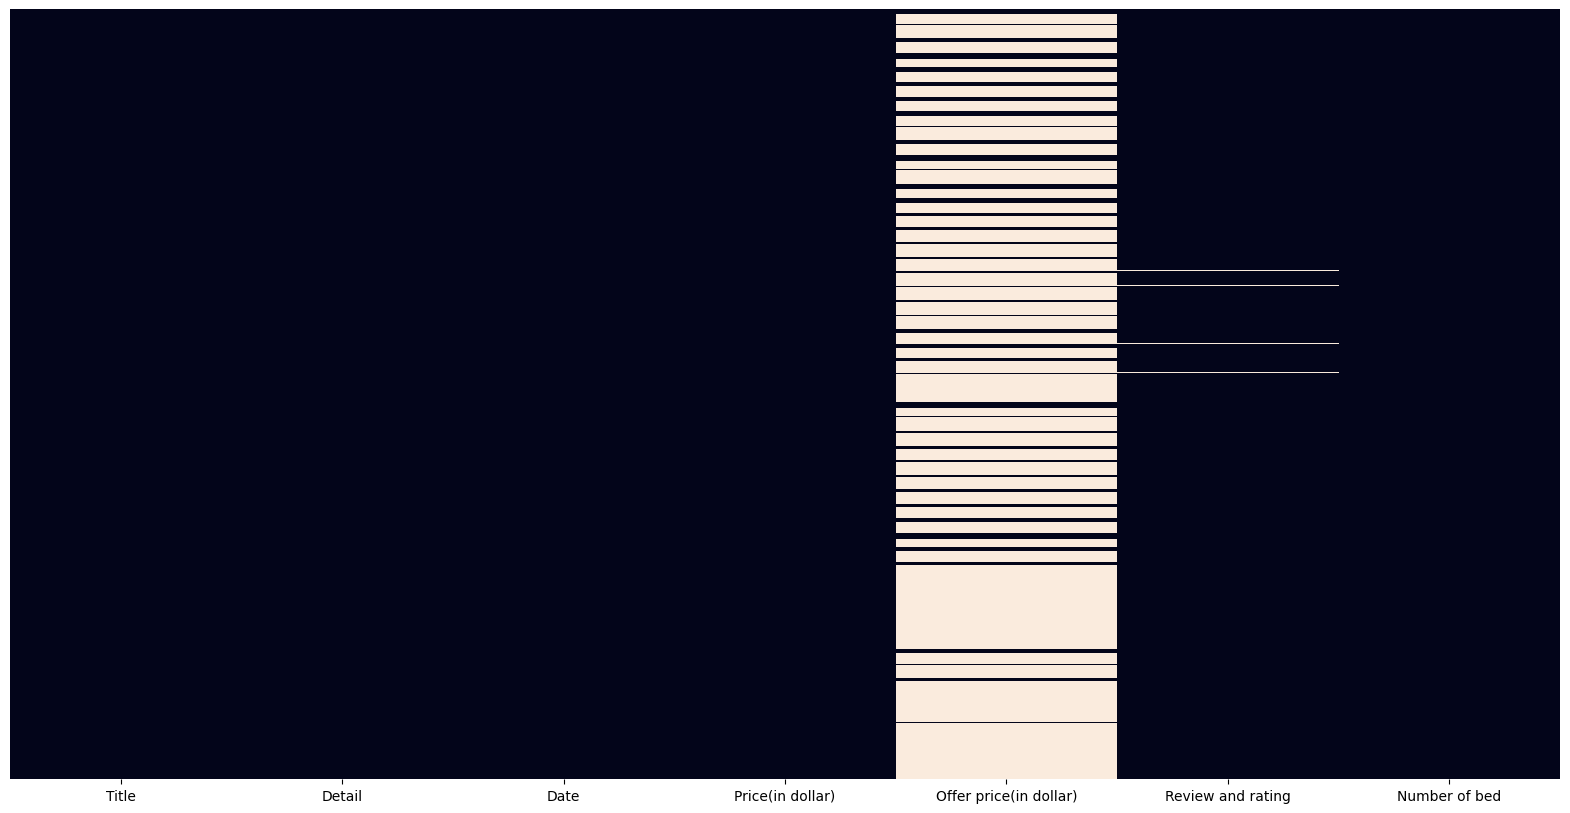

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

##### Zero Values

In [11]:
# percentage of 0 values in each column
values_tot = len(df.index)
df[df == 0].count()/values_tot

Title                     0.0
Detail                    0.0
Date                      0.0
Price(in dollar)          0.0
Offer price(in dollar)    0.0
Review and rating         0.0
Number of bed             0.0
dtype: float64

##### Duplicates

In [12]:
# Review how many duplicates are in the dataframe
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (34, 7)


#### Nan Values

In [13]:
# count number of NaNs
df.isna().sum()

Title                       0
Detail                      0
Date                        0
Price(in dollar)            0
Offer price(in dollar)    787
Review and rating           6
Number of bed               0
dtype: int64

In [14]:
#Display data with any missing values
df.loc[df.isnull().any(axis=1)]

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed
6,"Home in Saco, Maine, US",The Beach House. Oceanfront & Sunrise Views!,Jun 4 - 9,607.00,NaN,4.64 (90),2 queen beds
7,"Chalet in Grand Ãtang, Canada",â¢ Cedar Peak â¢ 2 Bedroom Barrier-Free Chalet,Jun 8 - 15,381.00,NaN,5.0 (48),2 beds
8,"Room in Mexico City, Mexico","Room in apartment, traditional neighborhood",Jul 3 - 8,29.00,NaN,4.84 (58),2 beds
9,"Tiny home in Sandy Valley, Nevada, US",Peacock Tiny House near Las Vegas,Jun 26 - Jul 1,154.00,NaN,4.92 (744),3 beds
10,"Guest suite in Huntsville, Canada",Hidden Valleyâs Guest Suite - explore nature,Sep 4 - 10,207.00,NaN,4.97 (265),2 beds
...,...,...,...,...,...,...,...
948,Guest suite in Lake Worth,The Garden Suite at the Historic Chateau Bleu,May 1 - 6,141.00,NaN,4.85 (82),1 king bed
949,Room in Kissimmee,Private Room in Orlando/Kissimmee (2Twins) T1,May 1 - 6,43.00,NaN,4.9 (300),1 king bed
950,Guesthouse in San Antonio,Casa Alexander,May 1 - 6,73.00,NaN,4.92 (282),5 beds
951,Apartment in Englewood,BEACH FRONT Unit w/ Pool Sandy Toe's # 5,May 7 - 12,233.00,NaN,4.96 (318),4 beds


#### Unique Values

In [15]:
# Displays total number of unique values in each column.
df.nunique()

Title                     756
Detail                    839
Date                      204
Price(in dollar)          322
Offer price(in dollar)    108
Review and rating         754
Number of bed              33
dtype: int64

##### Unique Values for Category Data

In [16]:
# unique values for 'Number of bed'
df['Number of bed'].unique()

array(['4 beds', '5 beds', '1 queen bed', '1 double bed', '2 queen beds',
       '2 beds', '3 beds', '2 king beds', '1 king bed', '2 double beds',
       '1 bed', '9 beds', '1 sofa bed', '7 beds', '3 queen beds',
       '6 beds', '2 sofa beds', '2 single beds', '4 double beds',
       '4 sofa beds', '4 single beds', '3 double beds', '5 double beds',
       '11 beds', '1 bunk bed', '22 beds', '3 king beds', '4 king beds',
       '8 beds', '17 beds', '4 queen beds', '13 beds', '10 beds'],
      dtype=object)

In [17]:
import plotly.express as px
fig = px.bar(df, x='Number of bed')
fig.show()